## Assignment-3
### Mehul Oswal | 31444

In [2]:
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt

## Part 1. Using the NBA dataset 

In [3]:
# Importing dataset
df = pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [4]:
print("(Rows , Col) ->", df.shape)

(Rows , Col) -> (458, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [6]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

### Displaying mean, median, mode and standard deviation for the dataset

In [8]:
# Displaying mean for the dataset
print("Mean:")
print(df.mean())

# Displaying median for the dataset
print("\nMedian:")
print(df.median())

# Displaying standard deviation for the dataset
print("\nStandard Deviation:")
print(df.std())

# Displaying mode for the dataset
print("\nMode:")
print(df.mode().head(1))

Mean:
Number    1.767834e+01
Age       2.693873e+01
Weight    2.215230e+02
Salary    4.842684e+06
dtype: float64

Median:
Number         13.0
Age            26.0
Weight        220.0
Salary    2839073.0
dtype: float64

Standard Deviation:
Number    1.596609e+01
Age       4.404016e+00
Weight    2.636834e+01
Salary    5.229238e+06
dtype: float64

Mode:
           Name                  Team  Number Position   Age Height  Weight  \
0  Aaron Brooks  New Orleans Pelicans     5.0       SG  24.0    6-9   220.0   

    College    Salary  
0  Kentucky  947276.0  


/var/folders/11/pzs50dmx7w3_b1r1l7rqtgjr0000gn/T/ipykernel_38543/559798116.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
/var/folders/11/pzs50dmx7w3_b1r1l7rqtgjr0000gn/T/ipykernel_38543/559798116.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())
/var/folders/11/pzs50dmx7w3_b1r1l7rqtgjr0000gn/T/ipykernel_38543/559798116.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [9]:
# Replacing null values in Age, Weight, Salary with respective mean value
# Filling in other values with 'Unknown' values
df.dropna(subset=['Name'],inplace=True)

salary_mean = df['Salary'].mean()
df['Salary'].fillna(salary_mean, inplace = True)

df['College'].fillna("Unknown College",inplace=True)

df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [10]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

### Categorizing the age groups

In [11]:
bins = [19,25,34,50]
labels = ['Age 19-24','Age 25-33','Age 34-49']
df['Age_Category'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Category
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06,Age 25-33
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06,Age 25-33
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06,Age 25-33
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06,Age 19-24
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Unknown College,5.000000e+06,Age 25-33
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2.239800e+06,Age 19-24
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06,Age 25-33
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Unknown College,9.000000e+05,Age 19-24
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Unknown College,2.900000e+06,Age 25-33


In [12]:
# Finding the age distribution
print("Number of players grouped by Age: \n")
print(df.groupby(["Age_Category"])["Age_Category"].count())

Number of players grouped by Age: 

Age_Category
Age 19-24    154
Age 25-33    261
Age 34-49     42
Name: Age_Category, dtype: int64


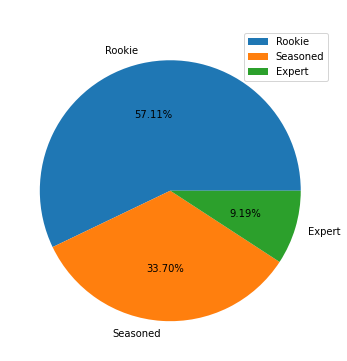

In [13]:
# Pie chart for gender distribution 

labels = ['Rookie', 'Seasoned', 'Expert']
size = df['Age_Category'].value_counts()

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Age Category', fontsize = 20, color="white")
plt.legend()
plt.show()

/Users/mehul/College/3rd_year/Sem2/DSBDA-Lab/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


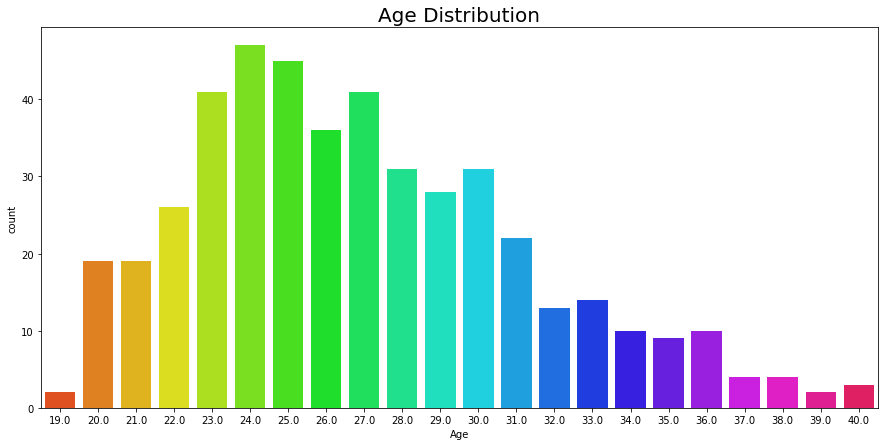

In [14]:
plt.rcParams['figure.figsize'] = (15, 7)
sb.countplot(df['Age'], palette = "hsv")
plt.title('Age Distribution', fontsize = 20)
plt.show()

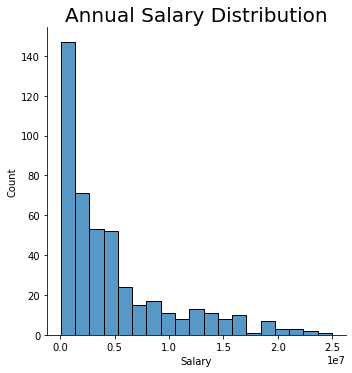

In [15]:
# Annual Salary Distribution
sb.displot(df, x="Salary",)
plt.title('Annual Salary Distribution', fontsize = 20)
plt.show()

## Summary Statistics for Salary grouped by age.

In [16]:
salary_by_age= df.groupby(["Age_Category"])[["Salary"]].describe()
salary_by_age

Salary                                                    \
              count          mean           std       min         25%   
Age_Category                                                            
Age 19-24     154.0  2.761705e+06  3.164929e+06   30888.0  1000000.00   
Age 25-33     261.0  6.081430e+06  5.734182e+06   55722.0  1149500.00   
Age 34-49      42.0  4.775018e+06  4.986122e+06  222888.0  1073091.25   

                                                
                    50%        75%         max  
Age_Category                                    
Age 19-24     1721379.5  3150510.0  16407501.0  
Age 25-33     4053446.0  9500000.0  22970500.0  
Age 34-49     3646250.0  5568750.0  25000000.0

In [17]:
salary_by_age.columns

MultiIndex([('Salary', 'count'),
            ('Salary',  'mean'),
            ('Salary',   'std'),
            ('Salary',   'min'),
            ('Salary',   '25%'),
            ('Salary',   '50%'),
            ('Salary',   '75%'),
            ('Salary',   'max')],
           )

In [18]:
# to adjust the column headings. 
# Above is a multiindex dataframe.
salary_by_age.columns = salary_by_age.columns.droplevel(0)
salary_by_age

,count,mean,std,min,25%,50%,75%,max
Age_Category,,,,,,,,
Age 19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1721379.5,3150510.0,16407501.0
Age 25-33,261.0,6.081430e+06,5.734182e+06,55722.0,1149500.00,4053446.0,9500000.0,22970500.0
Age 34-49,42.0,4.775018e+06,4.986122e+06,222888.0,1073091.25,3646250.0,5568750.0,25000000.0


### Plotting the data

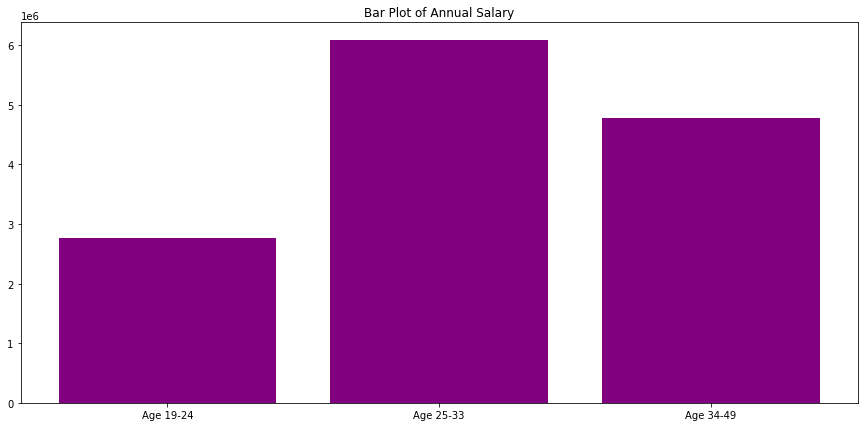

In [19]:
f, ax = plt.subplots()

ax.bar(salary_by_age.index,
        salary_by_age["mean"],
        color="purple")

ax.set(title="Bar Plot of Annual Salary")
plt.show()

### Other Summary Statistics

In [20]:
avg_monthly_precip_median = df.groupby(
    ["Age_Category"], as_index=False)[["Salary"]].median()
avg_monthly_precip_sum = df.groupby(
    ["Age_Category"], as_index=False)[["Salary"]].sum()

print("Median \n",avg_monthly_precip_median)
print("\nSum \n",avg_monthly_precip_sum)


Median 
   Age_Category     Salary
0    Age 19-24  1721379.5
1    Age 25-33  4053446.0
2    Age 34-49  3646250.0

Sum 
   Age_Category        Salary
0    Age 19-24  4.253025e+08
1    Age 25-33  1.587253e+09
2    Age 34-49  2.005508e+08


## Part-2 Using the Iris Dataset


In [23]:
df2 = pd.read_csv("Iris.csv")
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
df2["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Percentile Distribution of 3 species

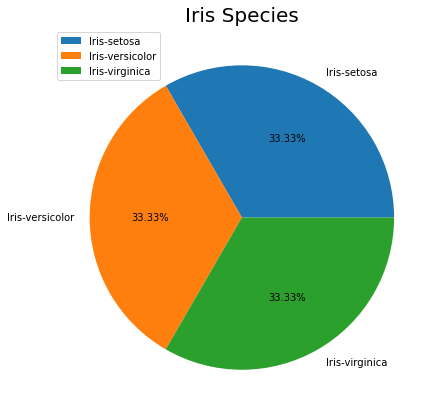

In [27]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
size = df2['Species'].value_counts()

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Iris Species', fontsize = 20)
plt.legend()
plt.show()

### Mean values grouped by species

In [28]:
# Displaying mean values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.mean())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


### Median values grouped by species

In [29]:
# Displaying median values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.median())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.0           3.4           1.50           0.2
Iris-versicolor            5.9           2.8           4.35           1.3
Iris-virginica             6.5           3.0           5.55           2.0


### Standard Deviation values grouped by species:

In [30]:
# Displaying standard deviation values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.std())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.352490      0.381024       0.173511      0.107210
Iris-versicolor       0.516171      0.313798       0.469911      0.197753
Iris-virginica        0.635880      0.322497       0.551895      0.274650


### Mode values grouped by species:

In [31]:
# Displaying mode values grouped by species
print(df2.groupby(["Species"]).agg(lambda x:x.value_counts().index[0])[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.1           3.4            1.5           0.2
Iris-versicolor            5.5           3.0            4.5           1.3
Iris-virginica             6.3           3.0            5.1           1.8
